In [34]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
# import tensorflow.keras.backend as K
import tensorflow.compat.v1.keras.backend as K
import numpy as np
import json
import shap
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [35]:
# load pre-trained model and choose two images to explain
model = VGG16(weights='imagenet', include_top=True)

In [36]:
X,y = shap.datasets.imagenet50()
to_explain = X[[39,41]]
# X.shape, y

In [37]:
# load the ImageNet class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
fname = shap.datasets.cache(url)
with open(fname) as f:
    class_names = json.load(f)
# class_names

In [38]:
# explain how the input to the 7th layer of the model explains the top two classes
def map2layer(x, layer):
    feed_dict = dict(zip([model.layers[0].input], [preprocess_input(x.copy())]))
    return K.get_session().run(model.layers[layer].input, feed_dict)

In [83]:
LAYER = 1

e = shap.GradientExplainer(
    (model.layers[LAYER].input, model.layers[-1].output),
    map2layer(X, LAYER),
    local_smoothing=0 # std dev of smoothing noise
)

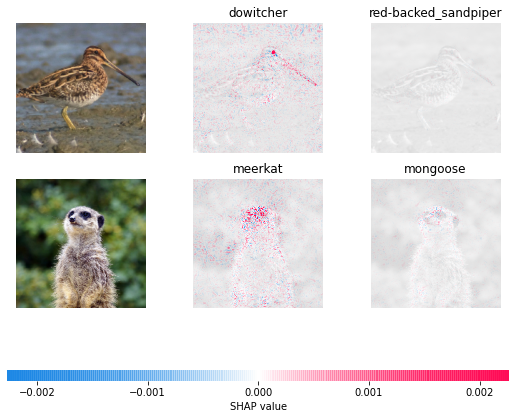

In [84]:

shap_values,indexes = e.shap_values(map2layer(to_explain, LAYER), ranked_outputs=2)

# get the names for the classes
index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)

# plot the explanations
shap.image_plot(shap_values, to_explain, index_names)